In [71]:
# NB: Code is not complete since lemmitizing is taking too long to complete

<IPython.core.display.Javascript object>

In [72]:
!pip install nb_black

You should consider upgrading via the 'c:\users\alu student\anaconda3\jupyter1\python.exe -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

## DATA CLEANING & LEMMITIZING

In [73]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# cleaning and dropping stop words
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

from nltk.stem import WordNetLemmatizer

# performance check
import time



[nltk_data] Downloading package stopwords to C:\Users\ALU
[nltk_data]     STUDENT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

In [74]:
df = pd.read_csv(os.path.join("..", "data", "mbti_1.csv"))

# splitting data into training and holdout dataset
personality_data, df_holdout = train_test_split(
    df, random_state=42, test_size=0.01, stratify=df["type"]
)

# saving the training and holdout datasets
personality_data.to_csv(os.path.join("..", "data", "personality_data.csv"), index=False)
df_holdout.to_csv(os.path.join("..", "data", "df_holdout.csv"), index=False)

# checking the value counts
print(personality_data["type"].value_counts())
print(df_holdout["type"].value_counts())

INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: type, dtype: int64
INFP    18
INFJ    15
INTP    13
INTJ    11
ENTP     7
ENFP     7
ISFP     3
ISTP     3
ENFJ     2
ISTJ     2
ISFJ     2
ENTJ     2
ESTP     1
ESFP     1
Name: type, dtype: int64


<IPython.core.display.Javascript object>


#### MBTI(personality data) evaluates the personality along 4 different traits, representing the way one processes the surrounding information based on their preferences and natural tendencies. The four traits are:

#### Extraversion (E) vs. Introversion (I) 
#### Sensing (S) vs. Intuition (N)
#### Thinking (T) vs. Feeling (F)
#### Judging (J) vs. Perceiving (P)

In [75]:
# Personality data used for training and testing the model
personality_data = pd.read_csv(os.path.join("..", "data", "personality_data.csv"))

<IPython.core.display.Javascript object>

In [76]:
# looking at the top 5 rows of the dataset
personality_data.head()

,type,posts
0,INFJ,'When asked of the things you wish you did ear...
1,INFJ,'I love both and they are equally important to...
2,INFJ,Really? You think implying that everyone who i...
3,ENFJ,'Love is a crazy thing. Se is our best form ...
4,INTP,'I am a physics undergrad with a computation e...


<IPython.core.display.Javascript object>

In [77]:
# checking the number of rows and columns
personality_data.shape

(8588, 2)

<IPython.core.display.Javascript object>

#### Checking for Null values

In [78]:
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

<IPython.core.display.Javascript object>

#### Checking for Class Imbalance

In [79]:
# checking number of records for each of the 16 personality types
personality_data["type"].value_counts()

INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: type, dtype: int64

<IPython.core.display.Javascript object>

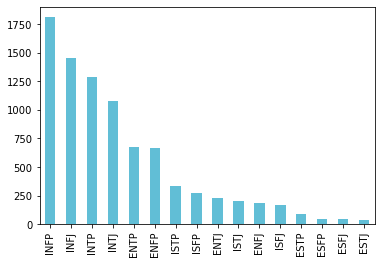

<IPython.core.display.Javascript object>

In [80]:
# visual
personality_data["type"].value_counts().plot(kind="bar", color="#61BED6")
plt.show()

In [81]:
#there seems to be an imbalance
# to handle the class imbalance better, converting the 16 classes into 4 more balanced classes


<IPython.core.display.Javascript object>

In [82]:
personality_data["is_Extrovert"] = personality_data["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
personality_data["is_Sensing"] = personality_data["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
personality_data["is_Thinking"] = personality_data["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
personality_data["is_Judging"] = personality_data["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

# rearranging the dataframe columns
personality_data = personality_data[
    ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
]
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...


<IPython.core.display.Javascript object>

#NB:

Extroversion vs. Introversion
I - 0
E - 1 
    
Sensing vs. Intuition 
N - 0 
S - 1
    
Thinking vs. Feeling
F - 0
T - 1
    
Judging vs. Perceiving
P - 0
J - 1 

In [83]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

<IPython.core.display.Javascript object>

In [84]:
# printing all the counts
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 6609
Extrovert Count: 1979
Intuition Count: 7403
Sensing Count: 1185
Feeling Count: 4646
Thinking Count: 3942
Perceiving Count: 5188
Judging Count: 3400


<IPython.core.display.Javascript object>

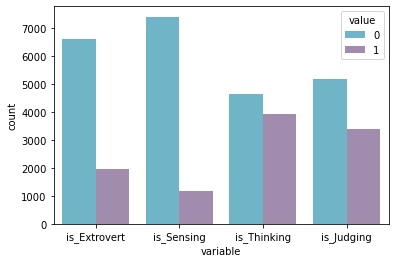

<IPython.core.display.Javascript object>

In [85]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]]
    ),
    palette=["#61BED6", "#A386B4"],
)

plt.show()

The class imbalance issue still seem to exist but we will proceed with this for now. 

#### Checking for the presence of correlations

In [86]:
corr = personality_data[
    ["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]
].corr()
corr.style.background_gradient(cmap="Blues").set_precision(4)

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
is_Extrovert,1.0000,-0.0458,0.0697,-0.1614
is_Sensing,-0.0458,1.0000,0.0814,-0.0146
is_Thinking,0.0697,0.0814,1.0000,-0.0046
is_Judging,-0.1614,-0.0146,-0.0046,1.0000


<IPython.core.display.Javascript object>

There does not seem to be any strong correlation between the four personality dimenions.

### Feature Engineering - I

#### Data Cleaning

In [87]:
# converting posts into lower case
personality_data["clean_posts"] = personality_data["posts"].str.lower()

# replacing ||| with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\|\|\|"), " "
)

personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
)

# dropping emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), ""
)

# dropping punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"[^a-z\s]"), " "
)

# dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), ""
    )

<IPython.core.display.Javascript object>

In [88]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,when asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,i love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really you think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love is a crazy thing se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,i am a physics undergrad with a computation e...


<IPython.core.display.Javascript object>

#### Lemmitizing

* CAUTION - This will take long to run!!

In [89]:
import nltk

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to C:\Users\ALU
[nltk_data]     STUDENT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<IPython.core.display.Javascript object>

In [90]:
# lemmitizing (excluding stop words in this step)

t = time.time()

lemmatizer = WordNetLemmatizer()

personality_data["clean_posts"] = personality_data["clean_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)

print(f"Lemmitizing Time: {time.time() - t} seconds")

Lemmitizing Time: 5387.869703292847 seconds


<IPython.core.display.Javascript object>

#### Removing words that are 1 to 2 characters long

In [91]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
)

<IPython.core.display.Javascript object>

In [92]:
# checking the cleaned and lemmitized data
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...


<IPython.core.display.Javascript object>

In [93]:
personality_data.shape

(8588, 7)

<IPython.core.display.Javascript object>

In [94]:
# lemmitizing took long. So saving the clean and lemmitized file to save time in further processing.
personality_data.to_csv(os.path.join("..", "data", "clean_data_1.csv"), index=False)

<IPython.core.display.Javascript object>

#### Analysis

In [95]:
# reading the clean_dataset_1
clean_personality_data = pd.read_csv(os.path.join("..", "data", "clean_data_1.csv"))

<IPython.core.display.Javascript object>

In [96]:
clean_personality_data.head()


,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...


<IPython.core.display.Javascript object>

In [97]:
# checking the number of rows and columns
clean_personality_data.shape


(8588, 7)

<IPython.core.display.Javascript object>

In [98]:
def unique_words(s):
    unique = set(s.split(" "))
    return len(unique) / 50


def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count / 50


def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count / 50

<IPython.core.display.Javascript object>

In [99]:
clean_personality_data["qm"] = clean_personality_data["posts"].apply(
    lambda s: s.count("?") / 50
)
clean_personality_data["em"] = clean_personality_data["posts"].apply(
    lambda s: s.count("!") / 50
)
clean_personality_data["colons"] = clean_personality_data["posts"].apply(colons)
clean_personality_data["emojis"] = clean_personality_data["posts"].apply(emojis)

<IPython.core.display.Javascript object>

In [100]:
clean_personality_data["word_count"] = clean_personality_data["posts"].apply(
    lambda s: (s.count(" ") + 1) / 50
)
clean_personality_data["unique_words"] = clean_personality_data["posts"].apply(
    unique_words
)

<IPython.core.display.Javascript object>

In [101]:
# stats

t = time.time()

# personality_data["avg_word_ct"] = personality_data["word_count"].apply(lambda s: s / 50)

clean_personality_data["post_length_var"] = clean_personality_data["posts"].apply(
    lambda x: np.var([len(post.split()) for post in x.split("|||")])
)

print(f"Time Taken: {time.time() - t}")

Time Taken: 1.585327386856079


<IPython.core.display.Javascript object>

In [102]:
clean_personality_data["upper"] = clean_personality_data["posts"].apply(
    lambda x: len([x for x in x.split() if x.isupper()]) / 50
)

<IPython.core.display.Javascript object>

In [103]:
clean_personality_data["link_count"] = clean_personality_data["posts"].apply(
    lambda s: s.count("http") / 50
)

<IPython.core.display.Javascript object>

In [104]:
ellipses_count = [
    len(re.findall(r"\.\.\.\ ", posts)) / 50
    for posts in clean_personality_data["posts"]
]
clean_personality_data["ellipses"] = ellipses_count

<IPython.core.display.Javascript object>

In [105]:
clean_personality_data["img_count"] = [
    len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post)) / 50
    for post in clean_personality_data["posts"]
]

<IPython.core.display.Javascript object>

In [106]:
clean_personality_data.head(5)


,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,qm,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.08,0.22,0.32,0.08,30.98,14.92,78.414931,1.46,0.04,0.62,0.00
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.12,0.36,0.14,0.00,28.58,12.72,160.744400,1.62,0.02,0.04,0.00
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.32,0.10,0.50,0.20,22.28,11.76,176.249600,1.30,0.06,0.04,0.04
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.04,0.00,0.00,0.00,34.36,15.38,83.520000,2.10,0.02,0.18,0.00
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.64,0.48,0.14,0.00,23.90,12.66,152.750400,1.70,0.50,0.00,0.04


<IPython.core.display.Javascript object>

In [107]:
clean_personality_data.dtypes


type                object
is_Extrovert         int64
is_Sensing           int64
is_Thinking          int64
is_Judging           int64
posts               object
clean_posts         object
qm                 float64
em                 float64
colons             float64
emojis             float64
word_count         float64
unique_words       float64
post_length_var    float64
upper              float64
link_count         float64
ellipses           float64
img_count          float64
dtype: object

<IPython.core.display.Javascript object>

In [108]:
# Saving the data with counts
clean_personality_data.to_csv(
    os.path.join("..", "data", "clean_data_3.csv"), index=False
)

<IPython.core.display.Javascript object>

# Vectorizing

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

<IPython.core.display.Javascript object>

In [110]:
# Using TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=25, max_df=0.8)
tfidf_words = tfidf_vectorizer.fit_transform(personality_data["clean_posts"])
tfidf_vectorized_data = pd.DataFrame(
    data=tfidf_words.toarray(), columns=tfidf_vectorizer.get_feature_names()
)

<IPython.core.display.Javascript object>

In [111]:
tfidf_vectorized_data.head()


,aback,abandon,abandoned,abandoning,abandonment,abbey,abbreviation,abhor,abide,ability,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [112]:
# Saving the vectorized data
tfidf_vectorized_data.to_csv(os.path.join("..", "data", "tfidf_vectorized_data.csv"), index=False)


<IPython.core.display.Javascript object>

In [113]:
# Using CountVectorizer

count_vectorizer = CountVectorizer(
    decode_error="ignore",
    min_df=25,
    max_df=0.8,
)

count_words = count_vectorizer.fit_transform(personality_data["clean_posts"])
count_vectorized_data = pd.DataFrame(
    data=count_words.toarray(), columns=count_vectorizer.get_feature_names()
)

<IPython.core.display.Javascript object>

In [114]:
count_vectorized_data.head()


,aback,abandon,abandoned,abandoning,abandonment,abbey,abbreviation,abhor,abide,ability,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [115]:
# Saving the Count vectorized data
count_vectorized_data.to_csv(
    os.path.join("..", "data", "count_vectorized_data.csv"), index=False
)

<IPython.core.display.Javascript object>

# Visualization

In [116]:
# variables
data_path = os.path.join("..", "data")
img_path = os.path.join("..", "static", "images")

nt = "#61BED6"
nf = "#A386B4"
sj = "#56AC8A"
sp = "#DFC10C"

colors_d = {
    "ENTP": nt,
    "INTP": nt,
    "INTJ": nt,
    "ENTJ": nt,
    "INFJ": nf,
    "ENFJ": nf,
    "INFP": nf,
    "ENFP": nf,
    "ISFJ": sj,
    "ISTJ": sj,
    "ESTJ": sj,
    "ESFJ": sj,
    "ISFP": sp,
    "ISTP": sp,
    "ESTP": sp,
    "ESFP": sp,
}

<IPython.core.display.Javascript object>

In [117]:
personality_data = pd.read_csv(os.path.join("..", "data", "clean_data_3.csv"))

<IPython.core.display.Javascript object>

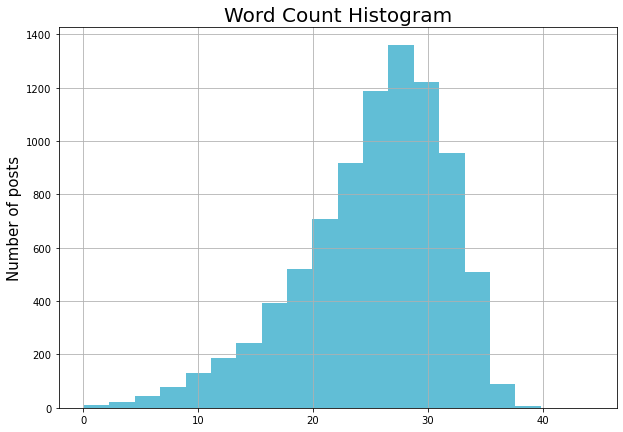

<IPython.core.display.Javascript object>

In [118]:
plt.figure(figsize=(10, 7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
personality_data["word_count"].hist(bins=20, color=nt)
plt.savefig(os.path.join(img_path, "word_hist.png"))
plt.show()



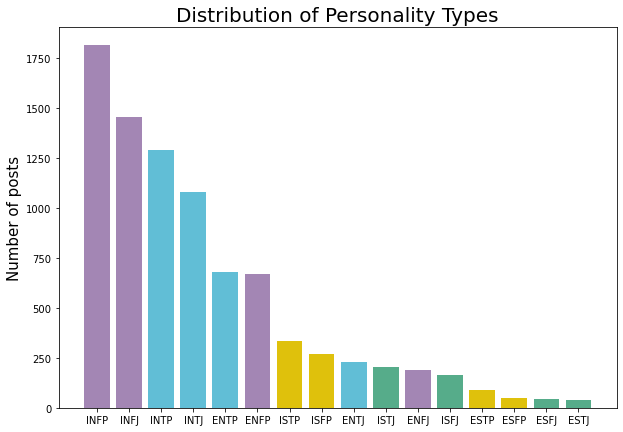

<IPython.core.display.Javascript object>

In [119]:
mb = (
    personality_data.groupby("type")
    .agg({"type": "count"})
    .rename(columns={"type": "count"})
    .sort_values("count", ascending=False)
)
colors = {x: colors_d[x] for x in mb.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Distribution of Personality Types", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.bar(mb.index, mb["count"], color=list(colors.values()))
plt.savefig(os.path.join(img_path, "type_hist.png"))
plt.show()


# Model Evaluation

In [120]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer


!pip install -U imbalanced-learn



You should consider upgrading via the 'c:\users\alu student\anaconda3\jupyter1\python.exe -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [122]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

<IPython.core.display.Javascript object>

In [123]:
!pip install delayed

You should consider upgrading via the 'c:\users\alu student\anaconda3\jupyter1\python.exe -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

In [124]:
import os
# class imbalance
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler


# model evaluation
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score


<IPython.core.display.Javascript object>

In [125]:
# performance check
import time
import warnings

warnings.filterwarnings("ignore")

# sparse to dense
from sklearn.base import TransformerMixin


class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# saving the model
from joblib import dump

# code formatter
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [126]:
clean_personality_data.head(2)

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,qm,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.08,0.22,0.32,0.08,30.98,14.92,78.414931,1.46,0.04,0.62,0.0
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.12,0.36,0.14,0.00,28.58,12.72,160.744400,1.62,0.02,0.04,0.0


<IPython.core.display.Javascript object>

In [127]:
X = clean_personality_data[
    [
        "clean_posts",
        "word_count",
        "qm",
        "em",
        "colons",
        "emojis",
        "unique_words",
        "post_length_var",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
    ]
]

# setting y to four target classes -> is_Extrovert, is_Sensing, is_Thinking, is_Judging
y = clean_personality_data.iloc[:, 1:5]

# ensuring that X and y row count matches
print(X.shape)
print(y.shape)

(8588, 12)
(8588, 4)


<IPython.core.display.Javascript object>

In [128]:
# Creating list of words to be dropped

<IPython.core.display.Javascript object>

In [129]:
additional_stopwords = [
    "hey",
    "hello",
    "briggs",
    "cat",
    "car",
    "mbti",
    "soup",
    "tea",
    "sport",
    "snow",
    "christmas",
]

<IPython.core.display.Javascript object>

In [130]:
counts_n_scores = [
    
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]

# for selecting k best features from features other than words
best_k_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif, k=10))

# setting up preprocessing for TF-IDF vectorizer
preprocesser_tf = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)

# setting up preprocessing for COUNT vectorizer
preprocesser_ct = ColumnTransformer(
    transformers=[
        (
            "ct_vect",
            CountVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)


<IPython.core.display.Javascript object>

In [131]:
counts_n_scores = [
"clean_posts",
        "word_count",
        "qm",
        "em",
        "colons",
        "emojis",
        "unique_words",
        "post_length_var",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
]



<IPython.core.display.Javascript object>

In [132]:
# setting up the personality dictionary for printing scores for each class
mbti_type = {
    "is_Extrovert": "Extrovert vs Introvert",
    "is_Sensing": "Sensing vs Intuition",
    "is_Thinking": "Thinking vs Feeling",
    "is_Judging": "Judging vs Perceiving",
}

# function to build the model for predicting each of the 4 target classes
def build_model(model, X, target, vectorizer_name):

    for col in target.columns:

        print(f"\n{mbti_type[col]}")
        target = y[col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, target, test_size=0.2, random_state=42, stratify=target
        )

        # model training
        model.fit(X_train, y_train)

        # y_hat
        y_pred = model.predict(X_test)

        # y_probability
        y_proba = model.predict_proba(X_test)[:, 1]

        # precision recall score
        average_precision = average_precision_score(y_test, y_proba)

        # model evaluation
        print(
            f"Geometric Mean Score: {geometric_mean_score(y_test, y_pred, average='weighted'):.2f}"
        )
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
        print(f"Average Precision-Recall Score: {average_precision:.2f}")
        print(classification_report_imbalanced(y_test, y_pred))

<IPython.core.display.Javascript object>

# TF-IDF Logistic Regression


In [133]:
%%time

tfidf_logistic_regression = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(tfidf_logistic_regression, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.68
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.48
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.69      0.68      0.77      0.68      0.47      1322
          1       0.39      0.68      0.69      0.50      0.68      0.47       396

avg / total       0.77      0.69      0.68      0.71      0.68      0.47      1718


Sensing vs Intuition
Geometric Mean Score: 0.72
ROC-AUC Score: 0.79
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.70      0.73      0.80      0.71      0.51      1481
          1       0.28      0.73      0.70      0.40      0.71      0.51       237

avg / total       0.85      0.70      0.73      0.75      0.71      0.51      1718


Thinking vs Feeling
Geometric Mean Score: 0.78
ROC-AUC Score: 0.87
Average Precision-Recall Score: 0.84
           

<IPython.core.display.Javascript object>

# Count Vectorized Logistic Regression

In [134]:
%%time
ct_logistic_regression = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(ct_logistic_regression, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.68      0.62      0.76      0.65      0.42      1322
          1       0.37      0.62      0.68      0.46      0.65      0.42       396

avg / total       0.74      0.67      0.63      0.69      0.65      0.42      1718


Sensing vs Intuition
Geometric Mean Score: 0.68
ROC-AUC Score: 0.74
Average Precision-Recall Score: 0.34
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.65      0.71      0.77      0.68      0.46      1481
          1       0.24      0.71      0.65      0.36      0.68      0.46       237

avg / total       0.84      0.66      0.70      0.71      0.68      0.46      1718


Thinking vs Feeling
Geometric Mean Score: 0.78
ROC-AUC Score: 0.86
Average Precision-Recall Score: 0.83
           

<IPython.core.display.Javascript object>

# TF-IDF Logistic Lasso

In [135]:
%%time
tfidf_logistic_regression_lasso = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='saga' )
)
build_model(tfidf_logistic_regression_lasso, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.58
ROC-AUC Score: 0.61
Average Precision-Recall Score: 0.33
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.57      0.59      0.68      0.58      0.34      1322
          1       0.29      0.59      0.57      0.39      0.58      0.34       396

avg / total       0.70      0.58      0.59      0.61      0.58      0.34      1718


Sensing vs Intuition
Geometric Mean Score: 0.53
ROC-AUC Score: 0.56
Average Precision-Recall Score: 0.17
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.45      0.62      0.60      0.53      0.27      1481
          1       0.15      0.62      0.45      0.24      0.53      0.28       237

avg / total       0.78      0.47      0.59      0.55      0.53      0.27      1718


Thinking vs Feeling
Geometric Mean Score: 0.67
ROC-AUC Score: 0.74
Average Precision-Recall Score: 0.70
           

<IPython.core.display.Javascript object>

# Count Vectorized Logistic Lasso

In [136]:
ct_logistic_regression_lasso = imb_make_pipeline(
    preprocesser_ct,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l1", solver="saga"),
)
build_model(ct_logistic_regression_lasso, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.70
Average Precision-Recall Score: 0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.68      0.63      0.76      0.65      0.43      1322
          1       0.37      0.63      0.68      0.46      0.65      0.42       396

avg / total       0.75      0.67      0.64      0.69      0.65      0.43      1718


Sensing vs Intuition
Geometric Mean Score: 0.69
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.34
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.64      0.73      0.76      0.69      0.47      1481
          1       0.25      0.73      0.64      0.37      0.69      0.48       237

avg / total       0.84      0.66      0.72      0.71      0.69      0.47      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.84
Average Precision-Recall Score: 0.81
           

<IPython.core.display.Javascript object>

# TF-IDF Logistic Ridge

In [137]:
tfidf_logistic_regression_ridge = imb_make_pipeline(
    preprocesser_tf,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l2", solver="saga"),
)
build_model(tfidf_logistic_regression_ridge, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.64
ROC-AUC Score: 0.67
Average Precision-Recall Score: 0.38
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.62      0.65      0.72      0.64      0.40      1322
          1       0.34      0.65      0.62      0.45      0.64      0.41       396

avg / total       0.74      0.63      0.65      0.66      0.64      0.40      1718


Sensing vs Intuition
Geometric Mean Score: 0.54
ROC-AUC Score: 0.57
Average Precision-Recall Score: 0.18
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.55      0.54      0.68      0.54      0.30      1481
          1       0.16      0.54      0.55      0.25      0.54      0.30       237

avg / total       0.78      0.55      0.54      0.62      0.54      0.30      1718


Thinking vs Feeling
Geometric Mean Score: 0.69
ROC-AUC Score: 0.77
Average Precision-Recall Score: 0.73
           

<IPython.core.display.Javascript object>

# Count Vectorized Logistic Ridge

In [138]:
ct_logistic_regression_ridge = imb_make_pipeline(
    preprocesser_ct,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l2", solver="saga"),
)
build_model(ct_logistic_regression_ridge, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.64
ROC-AUC Score: 0.69
Average Precision-Recall Score: 0.37
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.66      0.63      0.74      0.64      0.42      1322
          1       0.36      0.63      0.66      0.45      0.64      0.41       396

avg / total       0.74      0.65      0.64      0.68      0.64      0.42      1718


Sensing vs Intuition
Geometric Mean Score: 0.68
ROC-AUC Score: 0.74
Average Precision-Recall Score: 0.35
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.67      0.69      0.78      0.68      0.46      1481
          1       0.25      0.69      0.67      0.37      0.68      0.46       237

avg / total       0.84      0.67      0.68      0.72      0.68      0.46      1718


Thinking vs Feeling
Geometric Mean Score: 0.78
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.82
           

<IPython.core.display.Javascript object>

# TF-IDF Support Vector Classifier

In [139]:
tfidf_svc = imb_make_pipeline(
    preprocesser_tf,
    RandomUnderSampler(),
    DenseTransformer(),
    SVC(kernel="linear", probability=True),
)
build_model(tfidf_svc, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.68
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.46
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.66      0.69      0.76      0.68      0.46      1322
          1       0.38      0.69      0.66      0.49      0.68      0.46       396

avg / total       0.76      0.67      0.69      0.70      0.68      0.46      1718


Sensing vs Intuition
Geometric Mean Score: 0.70
ROC-AUC Score: 0.77
Average Precision-Recall Score: 0.34
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.68      0.73      0.79      0.70      0.49      1481
          1       0.27      0.73      0.68      0.39      0.70      0.50       237

avg / total       0.85      0.69      0.72      0.73      0.70      0.49      1718


Thinking vs Feeling
Geometric Mean Score: 0.78
ROC-AUC Score: 0.86
Average Precision-Recall Score: 0.84
           

<IPython.core.display.Javascript object>